<a href="https://colab.research.google.com/github/usshaa/Data_Science/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Data Science Case Study: Analyzing Customer Churn

This case study demonstrates how to use Python's data science libraries to analyze customer churn data, build and evaluate predictive models, and visualize results.

## Table of Contents
1. [Introduction](#introduction)
2. [Setup and Data Loading](#setup-and-data-loading)
3. [Data Exploration with NumPy and Pandas](#data-exploration-with-numpy-and-pandas)
4. [Data Visualization with Matplotlib and Seaborn](#data-visualization-with-matplotlib-and-seaborn)
5. [Machine Learning with Scikit-learn](#machine-learning-with-scikit-learn)
6. [Model Evaluation and Interpretation](#model-evaluation-and-interpretation)
7. [Conclusion](#conclusion)

## Introduction

In this case study, we'll analyze a telecommunications company's customer data to predict which customers are likely to churn (cancel their service). We'll use:

- **NumPy** for numerical operations
- **Pandas** for data manipulation and analysis
- **Matplotlib** and **Seaborn** for data visualization
- **Scikit-learn** for building and evaluating machine learning models

## Setup and Data Loading

First, let's import the necessary libraries and load our dataset:

In [117]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline

In [118]:
# Set visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

In [119]:
# Load the dataset (using a common telecom churn dataset)
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)
print(f"Dataset shape: {df.shape}")

Dataset shape: (7043, 21)


## Data Exploration with NumPy and Pandas

Let's explore the dataset and prepare it for analysis:

In [120]:
# Display basic information about the dataset
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

In [121]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [122]:
# Basic statistics
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [123]:
# Convert 'TotalCharges' to numeric (it might be loaded as object)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [124]:
# Fill missing values
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

<ipython-input-124-8f19d7959790>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [125]:
# Convert categorical target to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [126]:
# Feature engineering: Create tenure groups
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, np.inf],
                            labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60+'])

In [127]:
# Calculate churn rate
churn_rate = df['Churn'].mean() * 100
print(f"\nOverall churn rate: {churn_rate:.2f}%")


Overall churn rate: 26.54%


In [128]:
# Analyze churn by contract type
contract_churn = df.groupby('Contract')['Churn'].mean() * 100
print("\nChurn rate by contract type:")
print(contract_churn)


Churn rate by contract type:
Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64


## Data Visualization with Matplotlib and Seaborn

Now let's create visualizations to better understand the data:

In [129]:
# Set up a figure with multiple subplots
plt.figure(figsize=(18, 12))

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

Text(0, 0.5, 'Count')

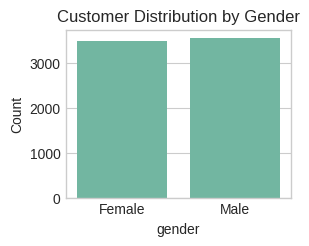

In [169]:
# 1. Customer Distribution by Gender
plt.subplot(2, 2, 1)
sns.countplot(x='gender', data=df)
plt.title('Customer Distribution by Gender')
plt.ylabel('Count')

Text(0, 0.5, 'Churn Rate')

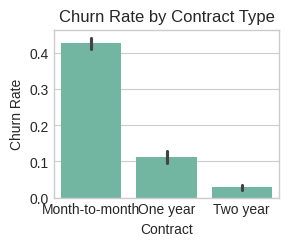

In [170]:
# 2. Churn Rate by Contract Type
plt.subplot(2, 2, 2)
sns.barplot(x='Contract', y='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '0-12'),
  Text(1, 0, '12-24'),
  Text(2, 0, '24-36'),
  Text(3, 0, '36-48'),
  Text(4, 0, '48-60'),
  Text(5, 0, '60+')])

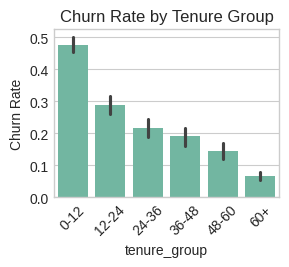

In [173]:
# 3. Churn Rate by Tenure Group
plt.subplot(2, 2, 3)
sns.barplot(x='tenure_group', y='Churn', data=df)
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)

Text(0.5, 0, 'Churn (0=No, 1=Yes)')

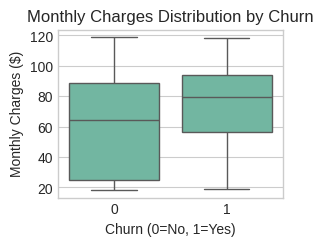

In [174]:
# 4. Monthly Charges Distribution by Churn
plt.subplot(2, 2, 4)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges Distribution by Churn')
plt.ylabel('Monthly Charges ($)')
plt.xlabel('Churn (0=No, 1=Yes)')

Text(0.5, 1.0, 'Correlation Matrix')

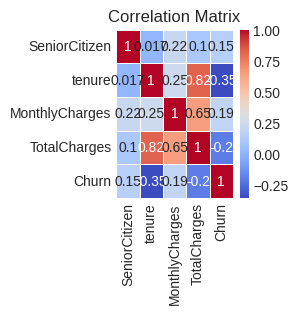

In [176]:
# 5. Correlation Matrix of Numerical Variables
plt.subplot(2, 3, 5)
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

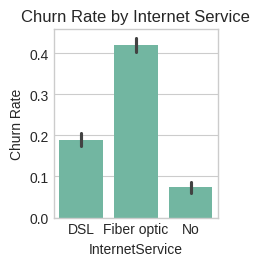

In [135]:
# 6. Churn by Internet Service
plt.subplot(2, 3, 6)
sns.barplot(x='InternetService', y='Churn', data=df)
plt.title('Churn Rate by Internet Service')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()

In [136]:
# Additional visualization: Feature importance
plt.figure(figsize=(12, 8))
# Create a list of categorical columns
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
           'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
           'PaymentMethod']

<Figure size 1200x800 with 0 Axes>

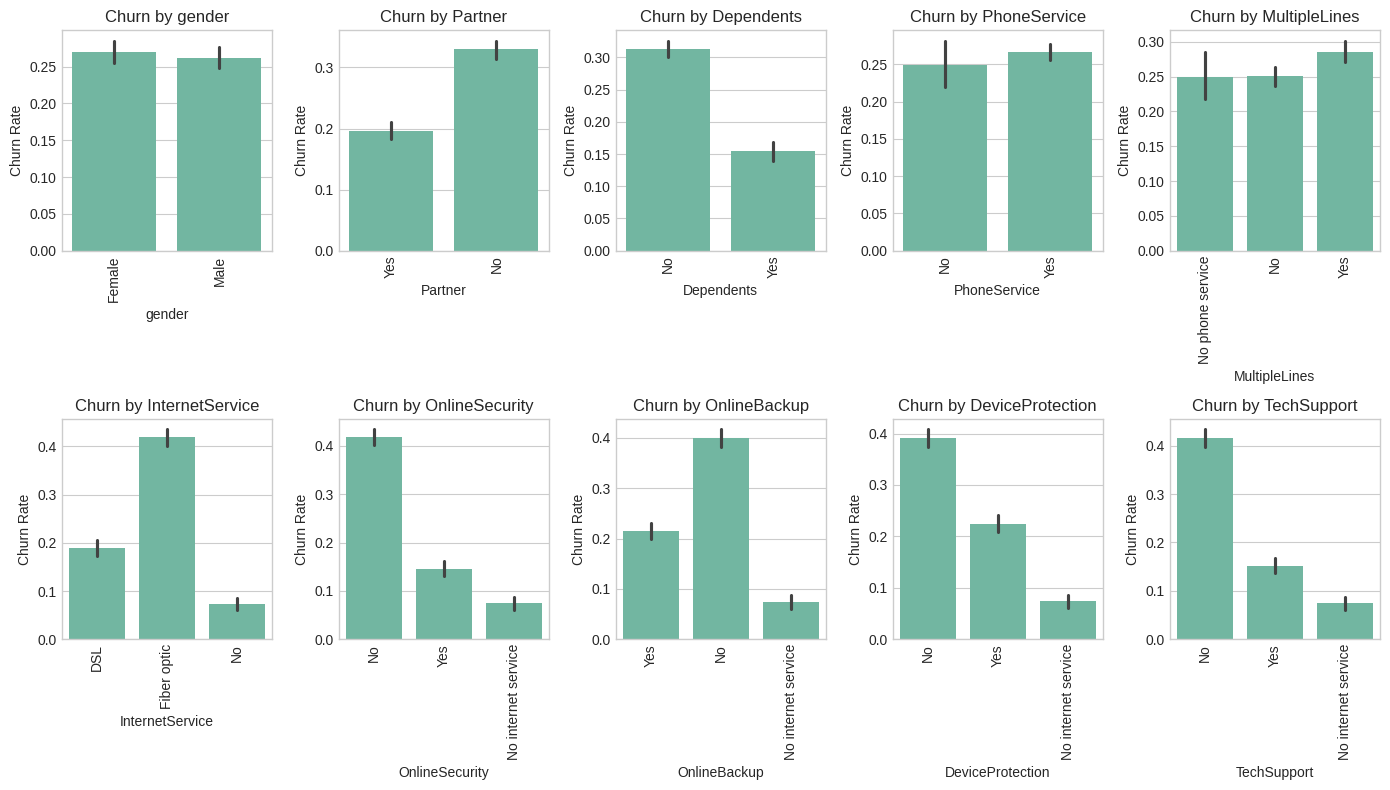

In [137]:
# Plot churn rate for top 10 categorical features
plt.figure(figsize=(14, 8))
for i, col in enumerate(cat_cols[:10]):
    plt.subplot(2, 5, i+1)
    sns.barplot(x=col, y='Churn', data=df)
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=90)
    plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()

## Machine Learning with Scikit-learn

Now, let's prepare the data for machine learning and train some models:

In [138]:
# Prepare data for modeling
# Select features
X = df.drop(['customerID', 'Churn', 'tenure_group'], axis=1)

In [139]:
# Select columns by data type
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [140]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [141]:
# Define target variable
y = df['Churn']

In [142]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (5634, 30)
Testing set shape: (1409, 30)


In [144]:
# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [145]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [146]:
# Make predictions
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

In [157]:
# Extract the trained model
rf_model = pipeline.named_steps['classifier']

In [148]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

In [149]:
print("\nTop 10 important features:")
print(feature_importance.head(10))


Top 10 important features:
                           Feature  Importance
3                     TotalCharges    0.190070
1                           tenure    0.175139
2                   MonthlyCharges    0.172152
10     InternetService_Fiber optic    0.036002
28  PaymentMethod_Electronic check    0.035156
25               Contract_Two year    0.030504
13              OnlineSecurity_Yes    0.029633
4                      gender_Male    0.027534
26            PaperlessBilling_Yes    0.025265
5                      Partner_Yes    0.024054


## Model Evaluation and Interpretation

Finally, let's evaluate the model's performance and visualize the results:

In [150]:
# Model evaluation
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[943  93]
 [200 173]]


In [151]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [152]:
# Calculate AUC-ROC
auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nAUC-ROC Score: {auc:.4f}")


AUC-ROC Score: 0.8363


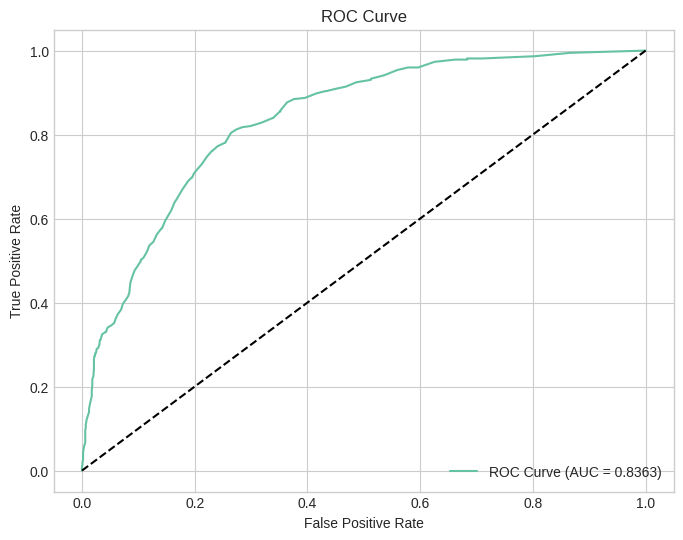

In [153]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

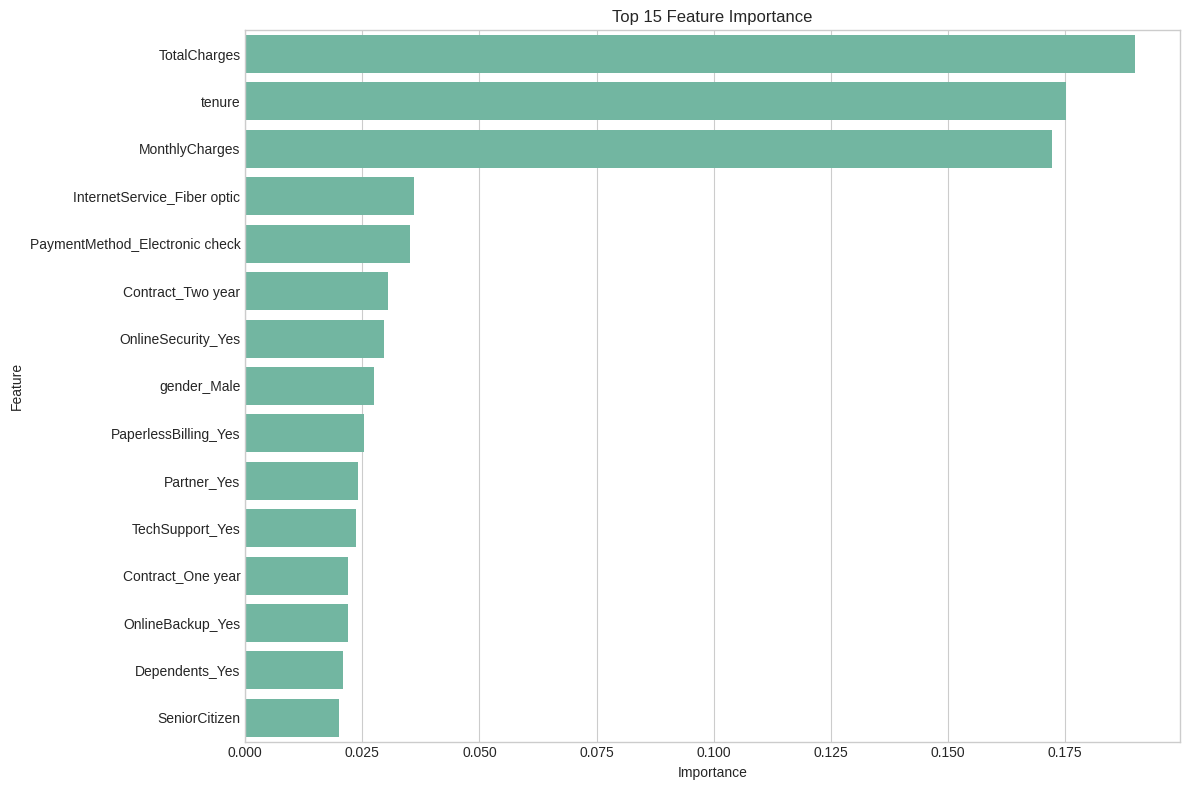

In [154]:
# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance')
plt.tight_layout()
plt.show()

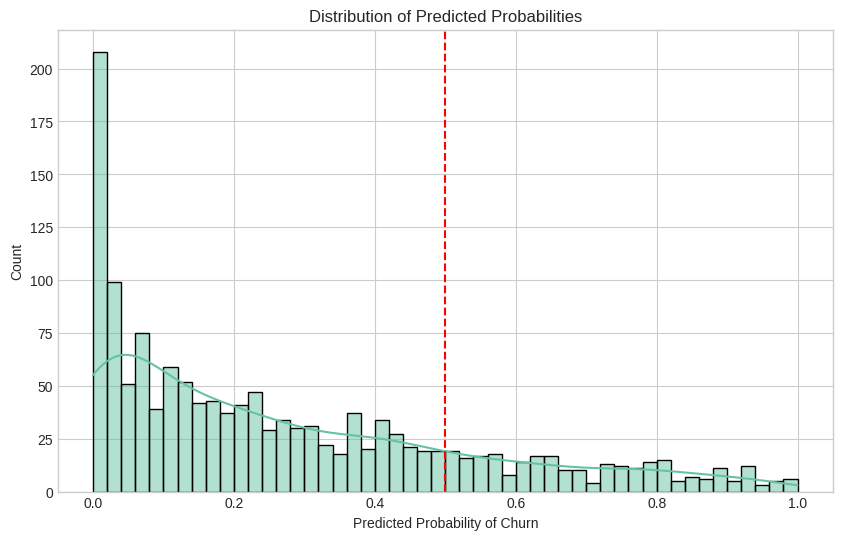

In [155]:
# Analyze predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_prob, bins=50, kde=True)
plt.axvline(0.5, color='red', linestyle='--')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Churn')
plt.ylabel('Count')
plt.show()

## Conclusion

In this case study, we've covered the following:

1. **NumPy and Pandas** for data loading, cleaning, and preprocessing
2. **Matplotlib and Seaborn** for creating various visualizations to understand the data
3. **Scikit-learn** for building a machine learning pipeline, training models, and evaluating their performance

The analysis revealed several key insights about customer churn:
- Contract type has a strong influence on churn rates
- Longer tenure is associated with lower churn
- Monthly charges show a relationship with churn
- Several services appear to affect customer retention

For further exploration, you could:
- Try different machine learning algorithms (e.g., Logistic Regression, XGBoost)
- Perform hyperparameter tuning to optimize model performance
- Implement cross-validation for more robust model evaluation
- Explore more advanced feature engineering techniques

This workflow demonstrates how Python's data science libraries work together to solve real-world business problems.